In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/cleaned_wide_format_data.pkl")

In [21]:
print(df.shape)
df.head()

(1728485, 9)


,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order
0,-2147483541,2059949086,"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, First Purchase, First Purch...",0,0
1,-2147481037,-1245770865,"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]","[Apply for Credit, Promotion Created, Discover...",0,0
2,-2147474335,-1929965268,"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",1,1
3,-2147474305,1098145658,"[6, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, 19, ...","[begin_checkout, application_web_view, applica...","[2021-11-28 22:27:11+00:00, 2021-11-28 22:28:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[First Purchase, Apply for Credit, Apply for C...",0,0
4,-2147472167,889210381,"[12, 19, 3, 4, 4, 1, 1, 11, 5, 4, 11, 5, 4, 6,...","[application_web_approved, application_web_vie...","[2023-02-19 08:23:54+00:00, 2023-02-19 14:21:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, Apply for Credit, Apply for...",1,1


In [22]:
df.columns

Index(['customer_id', 'account_id', 'ed_id', 'event_name', 'event_timestamp',
       'journey_steps_until_end', 'stage', 'account_activation',
       'place_order'],
      dtype='object')

In [23]:
df.dtypes

customer_id                 int64
account_id                  int64
ed_id                      object
event_name                 object
event_timestamp            object
journey_steps_until_end    object
stage                      object
account_activation          int64
place_order                 int64
dtype: object

## Examining first/last events

In [24]:
first_events = df['event_name'].apply(lambda x: x[0] if x else None)
last_events = df['event_name'].apply(lambda x: x[-1] if x else None)

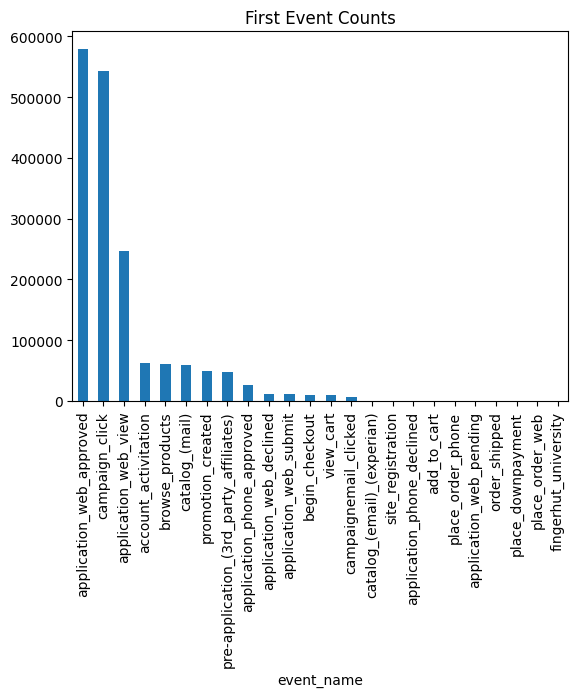

In [25]:
first_events.value_counts().plot(kind = 'bar')
plt.title("First Event Counts")
plt.show()

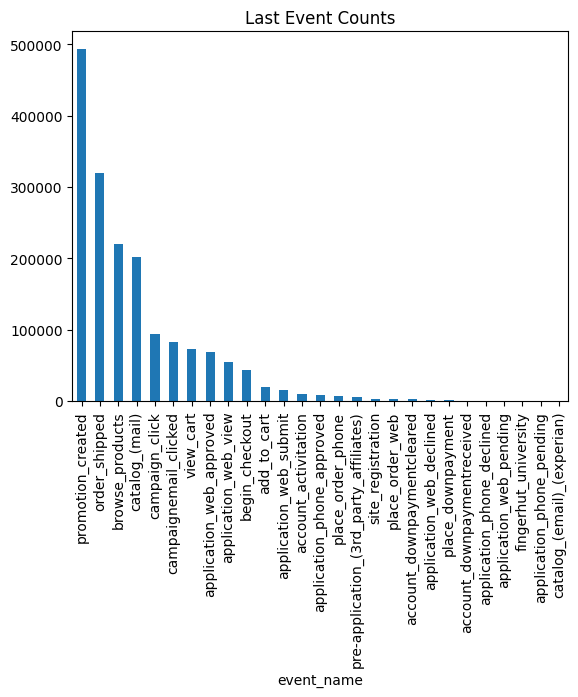

In [26]:
last_events.value_counts().plot(kind = 'bar')
plt.title("Last Event Counts")
plt.show()

In [27]:
df_with_orders = df[df['event_name'].apply(lambda x: 'order_shipped' in x)]

In [28]:
print(df_with_orders.shape)
df_with_orders.head()

(321160, 9)


,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order
2,-2147474335,-1929965268,"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",1,1
4,-2147472167,889210381,"[12, 19, 3, 4, 4, 1, 1, 11, 5, 4, 11, 5, 4, 6,...","[application_web_approved, application_web_vie...","[2023-02-19 08:23:54+00:00, 2023-02-19 14:21:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, Apply for Credit, Apply for...",1,1
13,-2147452610,-1905163177,"[12, 1, 29, 3, 4, 11, 19, 5, 6, 7, 5, 8, 6, 8,...","[application_web_approved, promotion_created, ...","[2023-07-25 19:46:36+00:00, 2023-07-25 20:32:2...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, Promotion Created, Credit A...",1,1
27,-2147425125,221594945,"[2, 19, 19, 19, 19, 19, 19, 19, 19, 19, 3, 19,...","[campaign_click, application_web_view, applica...","[2021-09-25 06:00:00+00:00, 2021-09-25 19:59:2...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",1,1
34,-2147395611,674764100,"[29, 2, 12, 4, 4, 4, 4, 4, 11, 4, 4, 11, 4, 5,...","[account_activitation, campaign_click, applica...","[2021-06-15 00:00:00+00:00, 2021-06-15 06:00:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Credit Account, Discover, Apply for Credit, F...",1,1


In [29]:
df_no_orders = df[df['event_name'].apply(lambda x: 'order_shipped' not in x)]

In [30]:
print(df_no_orders.shape)
df_no_orders.head()

(1407325, 9)


,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order
0,-2147483541,2059949086,"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, First Purchase, First Purch...",0,0
1,-2147481037,-1245770865,"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]","[Apply for Credit, Promotion Created, Discover...",0,0
3,-2147474305,1098145658,"[6, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, 19, ...","[begin_checkout, application_web_view, applica...","[2021-11-28 22:27:11+00:00, 2021-11-28 22:28:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[First Purchase, Apply for Credit, Apply for C...",0,0
5,-2147466542,-823743386,"[12, 1, 4, 11, 5, 1, 1, 21, 1, 21, 21, 1]","[application_web_approved, promotion_created, ...","[2021-12-25 22:00:57+00:00, 2021-12-25 22:01:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[Apply for Credit, Promotion Created, First Pu...",0,0
6,-2147466262,-296951572,"[2, 13, 19, 19, 12, 1, 4, 5, 19, 6, 3, 11, 2, 4]","[campaign_click, application_web_declined, app...","[2023-04-10 02:34:58+00:00, 2023-04-10 20:34:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[Discover, Apply for Credit, Apply for Credit,...",0,0


### Feature Engineering

In [31]:
def_df = pd.read_csv("/Users/alyssaliu/Desktop/StatsM148/Event Definitions.csv")
def_df

,event_name,journey_id,event_definition_id,milestone_number,stage
0,application_phone_approved,1,15,1.0,Apply for Credit
1,application_phone_declined,1,16,NaN,Apply for Credit
2,application_phone_pending,1,17,NaN,Apply for Credit
3,application_web_approved,1,12,1.0,Apply for Credit
4,application_web_declined,1,13,NaN,Apply for Credit
5,application_web_pending,1,14,NaN,Apply for Credit
6,application_web_submit,1,3,NaN,Apply for Credit
7,application_web_view,1,19,NaN,Apply for Credit
8,account_activitation,1,29,3.0,Credit Account
9,account_fraud_review,1,37,NaN,Credit Account


In [32]:
stage_dict = {'Apply for Credit' : 1, 'Credit Account' : 2, 'Discover' : 3, 'Downpayment' : 4, 'First Purchase' : 5, 
              'Order Shipped' : 6, 'Prospecting' : 7}
def_df['stage_int'] = def_df['stage'].map(stage_dict)

In [33]:
stage_mapping_dict = def_df.set_index('event_definition_id')['stage_int'].to_dict()

In [34]:
sampled_df = df.sample(n=500000, replace=False)

In [35]:
df.head(3)

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order
0,-2147483541,2059949086,"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, First Purchase, First Purch...",0,0
1,-2147481037,-1245770865,"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]","[Apply for Credit, Promotion Created, Discover...",0,0
2,-2147474335,-1929965268,"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",1,1


In [36]:
cutoff_date = pd.to_datetime('2023-09-20 12:29:58+0000', utc=True)
cutoff_date # this is like "today"

Timestamp('2023-09-20 12:29:58+0000', tz='UTC')

In [37]:
required_stages = {'Apply for Credit', 'First Purchase', 'Downpayment', 'Order Shipped'}
promotion_ids = [2, 9, 20, 21, 1, 24]


# Function to get the stage from the first id in the list
def get_stage_from_first_id(id_list):
    # Get the first id
    first_id = id_list[0]
    # Return the corresponding stage using the mapping dictionary
    return stage_mapping_dict.get(first_id, 0)

def get_stage_from_last_id(id_list):
    # Get the first id
    last_id = id_list[-1]
    # Return the corresponding stage using the mapping dictionary
    return stage_mapping_dict.get(last_id, 0)

def clean_df(df):
    df = df.reset_index(drop = True)

    # df['event_count'] = df['event_name'].apply(len)
    # df['num_accounts'] = df['account_id'].apply(len)
    # df['unique_event_count'] = df['event_name'].apply(lambda x: len(set(x)))
    # df['unique_stage_count'] = df['stage'].apply(lambda x: len(set(x)))
    
    df['first_event'] = df['ed_id'].apply(lambda x: x[0] if x else None)
    df['days_since_start'] = df['event_timestamp'].apply(lambda x: (cutoff_date - x[0]).days)
    # df['last_event'] = df['ed_id'].apply(lambda x: x[-1] if x else None)
    # df['len_journey'] = df['journey_steps_until_end'].apply(len)
    # df['days_in_journey'] = df['event_timestamp'].apply(lambda x: (x[-1] - x[0]).days)
    # df['progression_rate'] = df['len_journey'] / df['days_in_journey'] # estimate for progression rate of journey
    df['first_stage'] = df['ed_id'].apply(get_stage_from_first_id)
    # df['last_stage'] = df['ed_id'].apply(get_stage_from_last_id)

    df['first_event_month'] = df['event_timestamp'].apply(lambda x: x[0].month)
    df['first_event_day'] = df['event_timestamp'].apply(lambda x: x[0].day)
    df['first_event_hour'] = df['event_timestamp'].apply(lambda x: x[0].hour)

    # now create columns for whether a specific event is present or not
    # remember that ideal journey is defined as: Apply for credit > Make a first purchase > Make the down payment > Order Ships
    # df already has account activation and place order one hot encoded columns
    # df['apply_for_credit'] = df['stage'].apply(lambda x: 1 if 'Apply for Credit' in x else 0) # Apply for credit
    # df['make_first_purchase'] = df['stage'].apply(lambda x: 1 if 'First Purchase' in x else 0) # first purchase
    # df['downpayment'] = df['stage'].apply(lambda x: 1 if 'Downpayment' in x else 0) # downpayment
    # df['order_shipped'] = df['event_name'].apply(lambda x: 1 if 'order_shipped' in x else 0) # order shipped

    df['ideal_journey'] = df['stage'].apply(lambda x: 1 if required_stages.issubset(set(x)) else 0)
    df['promotion_exposure'] = df['ed_id'].apply(lambda x: 1 if any([i in x for i in promotion_ids]) else 0)


    df = df.drop(['event_name', 'event_timestamp', 'ed_id', 'journey_steps_until_end', 'stage', 'place_order', 'account_activation'], axis = 1)
    
    
    return df

In [38]:
sampled_df = clean_df(sampled_df)
whole_sampled_df = clean_df(df)

In [39]:
sampled_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/updated_clustering_sample_df.pkl")

In [40]:
whole_sampled_df.isna().any() # check for NA values

customer_id           False
account_id            False
first_event           False
days_since_start      False
first_stage           False
first_event_month     False
first_event_day       False
first_event_hour      False
ideal_journey         False
promotion_exposure    False
dtype: bool

In [41]:
whole_sampled_df

,customer_id,account_id,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
0,-2147483541,2059949086,12,715,1,10,5,8,0,1
1,-2147481037,-1245770865,12,25,1,8,26,12,0,1
2,-2147474335,-1929965268,2,159,3,4,14,1,1,1
3,-2147474305,1098145658,6,660,5,11,28,22,0,1
4,-2147472167,889210381,12,213,1,2,19,8,1,1
...,...,...,...,...,...,...,...,...,...,...
1728480,2147480051,-148210516,21,1006,7,12,18,0,0,1
1728481,2147480182,-1286764612,12,90,1,6,22,9,0,1
1728482,2147480920,496493954,2,487,3,5,21,6,0,1
1728483,2147482120,-488077144,12,51,1,7,30,15,0,1


In [42]:
whole_sampled_df.to_pickle(("/Users/alyssaliu/Desktop/StatsM148/updated_feature_engineered_data.pkl"))

In [43]:
model_df = whole_sampled_df.drop(['customer_id', 'account_id'], axis = 1)
model_df.head()

,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
0,12,715,1,10,5,8,0,1
1,12,25,1,8,26,12,0,1
2,2,159,3,4,14,1,1,1
3,6,660,5,11,28,22,0,1
4,12,213,1,2,19,8,1,1


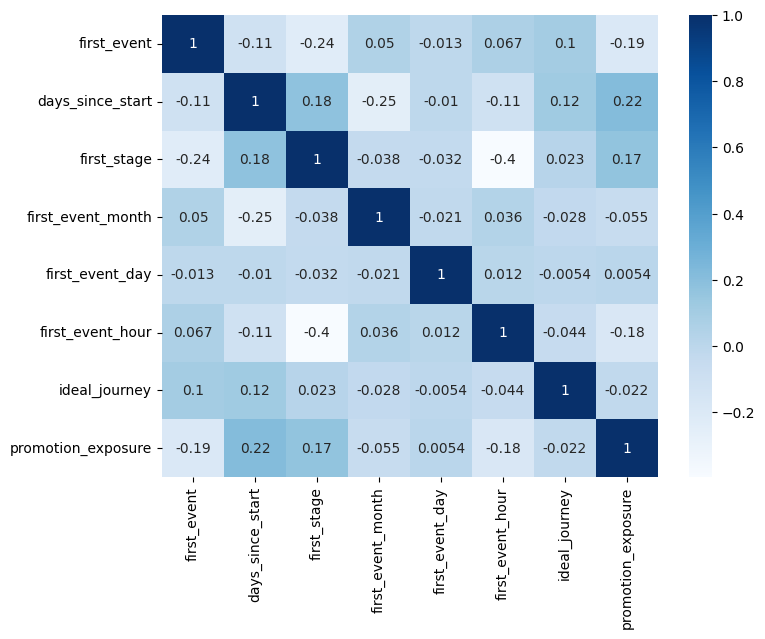

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(model_df.corr(), cmap='Blues', annot = True)
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
# scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
clf = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [50]:
print('accurary', accuracy)
print('precision', precision)
print('recall', recall)
print('f1', f1)

accurary 0.8172233218384961
precision 0.8299120234604106
recall 0.00540561190380685
f1 0.010741260864614566


In [51]:
from sklearn.metrics import classification_report

In [52]:
target_names = ['unsuccessful', 'successful']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

unsuccessful       0.82      1.00      0.90    465695
  successful       0.83      0.01      0.01    104706

    accuracy                           0.82    570401
   macro avg       0.82      0.50      0.46    570401
weighted avg       0.82      0.82      0.74    570401



### Now try with balanced data

In [53]:
clf = LogisticRegression(max_iter = 10000, class_weight = 'balanced').fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

unsuccessful       0.86      0.57      0.68    465695
  successful       0.23      0.58      0.33    104706

    accuracy                           0.57    570401
   macro avg       0.55      0.58      0.51    570401
weighted avg       0.74      0.57      0.62    570401



In [55]:
# Get the coefficients from the logistic regression model
coefficients = clf.coef_[0]  # For binary classification, model.coef_ is 2D, hence [0] for the first class
# Pair feature names with coefficients
feature_importance = zip(X_train.columns, coefficients)

# Sort features by absolute value of coefficient, in descending order
sorted_features = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

for feature, coef in sorted_features:
    print(f"{feature}: {coef}")


days_since_start: 0.3631168747248009
first_event: 0.2549463738768159
promotion_exposure: -0.06273897568256541
first_event_hour: -0.05687392456984631
first_stage: 0.055204895047418254
first_event_month: 0.020377738133430415
first_event_day: -0.002657523439450585
customer_id: -0.0017405619586212302
account_id: -0.0006202336558443794


In [57]:
y.value_counts(normalize = True)

ideal_journey
0    0.816759
1    0.183241
Name: proportion, dtype: float64

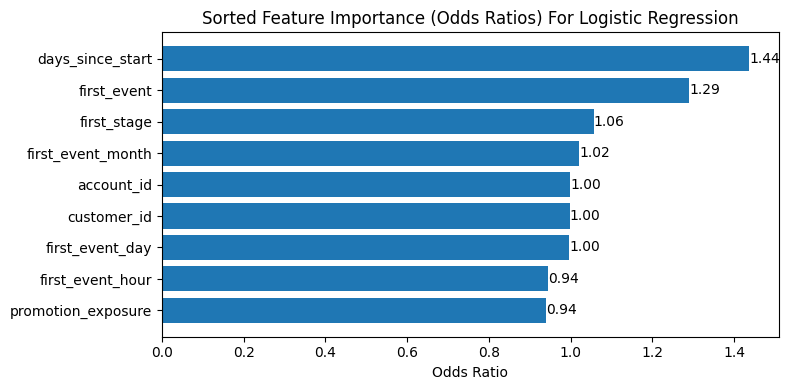

In [60]:
odds_ratios = np.exp(coefficients)
odds_df = pd.DataFrame({'Feature': X_train.columns, 'OddsRatio': odds_ratios})
odds_df_sorted = odds_df.sort_values(by='OddsRatio', ascending=True)

plt.figure(figsize=(8, 4))
barplot = plt.barh(odds_df_sorted['Feature'], odds_df_sorted['OddsRatio'])
for bar in barplot:
    plt.text(
        bar.get_width(),       # X position for text
        bar.get_y() + bar.get_height() / 2,  # Y position for text
        f"{bar.get_width():.2f}",  # Label text (formatted to 2 decimal places)
        va='center'  # Center alignment for text
    )

plt.xlabel('Odds Ratio')
plt.title('Sorted Feature Importance (Odds Ratios) For Logistic Regression')
plt.tight_layout() 
plt.show()

In [ ]:
np.exp()

## Try cross fold validation in case overfitting

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [40]:
model = LogisticRegression(max_iter=10000)

In [41]:
# Specify the number of folds, e.g., 10
k = 10

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

# Print the accuracy for each fold
print(f'Accuracy for each fold: {scores}')

# Print the mean accuracy across all folds
print(f'Mean accuracy: {np.mean(scores)}')


Accuracy for each fold: [0.81761538 0.81758645 0.81758066 0.81760959 0.8177253  0.81753911
 0.81760275 0.81754489 0.81738869 0.81771267]
Mean accuracy: 0.8175905488536899


## Look into other models

first test on sample data

In [42]:
temp = sampled_df.drop(['customer_id', 'account_id'], axis = 1)
temp.head()

,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
0,19,452,1,6,25,1,0,1
1,12,299,1,11,25,8,0,1
2,12,77,1,7,4,17,0,0
3,4,291,5,12,2,14,0,1
4,2,902,3,4,1,6,0,1


In [43]:
temp.shape

(500000, 8)

In [44]:
X_sample = temp.drop(['ideal_journey'], axis = 1)
y_sample = temp['ideal_journey']

In [45]:
# scale data
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)
X_sample_scaled = pd.DataFrame(X_sample_scaled, columns=X_sample.columns)

In [46]:
X_sample_scaled

,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,promotion_exposure
0,1.111889,-0.384390,-0.720606,-0.091906,1.064658,-1.216239,0.314428
1,0.203463,-0.911855,-0.720606,1.380873,1.064658,-0.123493,0.314428
2,0.203463,-1.677196,-0.720606,0.202650,-1.368214,1.281467,-3.180380
3,-0.834739,-0.939435,1.934916,1.675429,-1.599916,0.813147,0.314428
4,-1.094289,1.166979,0.607155,-0.681018,-1.715767,-0.435706,0.314428
...,...,...,...,...,...,...,...
499995,1.501214,1.198006,0.607155,-0.975574,0.832956,-0.435706,0.314428
499996,1.501214,-0.125828,0.607155,-0.681018,-0.557256,-0.435706,0.314428
499997,-1.094289,-0.318887,0.607155,-0.091906,-1.136511,-0.435706,0.314428
499998,-1.094289,0.732596,0.607155,0.497206,-1.252363,-0.435706,0.314428


In [47]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(X_sample_scaled, y_sample, test_size=0.33, random_state=42)

### Logistic Regression again to just get baseline for performance on sampled data

In [48]:
clf = LogisticRegression(max_iter = 10000).fit(X_train0, y_train0)
y_pred = clf.predict(X_test0)
accuracy = accuracy_score(y_test0, y_pred)
precision = precision_score(y_test0, y_pred)
recall = recall_score(y_test0, y_pred)
f1 = f1_score(y_test0, y_pred)

In [49]:
print('accurary', accuracy)
print('precision', precision)
print('recall', recall)
print('f1', f1)

accurary 0.8173090909090909
precision 0.8188976377952756
recall 0.0034408602150537634
f1 0.006852925672113864


### Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf_classifier = RandomForestClassifier(
    n_estimators=100,    # Start with 100 trees
    max_depth=None,      # None means nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    min_samples_split=2, # Minimum number of samples required to split an internal node
    min_samples_leaf=2,  # Minimum number of samples required to be at a leaf node
    max_features='sqrt', # Maximum number of features to consider for the best split
    n_jobs=-1,           # Use all processors for training
    random_state=42,      # For reproducibility
    class_weight = 'balanced'
)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accurary', accuracy)
print('precision', precision)
print('recall', recall)
print('f1', f1)

print(classification_report(y_test, y_pred, target_names=target_names))

# setting class weight to balanced brough accuracy down from 82% to 64% but raised the other metrics significantly

accurary 0.6454757267255843
precision 0.2602864320866868
recall 0.5056252745783432
f1 0.3436620632576557
              precision    recall  f1-score   support

unsuccessful       0.86      0.68      0.76    465695
  successful       0.26      0.51      0.34    104706

    accuracy                           0.65    570401
   macro avg       0.56      0.59      0.55    570401
weighted avg       0.75      0.65      0.68    570401



In [53]:
rf_classifier = RandomForestClassifier(
    n_estimators=100,    # Start with 1000 trees
    max_depth=None,      # None means nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    min_samples_split=2, # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    max_features='sqrt', # Maximum number of features to consider for the best split
    n_jobs=-1,           # Use all processors for training
    random_state=42      # For reproducibility
)

k = 10
scores = cross_val_score(model, X_scaled, y, cv=k, scoring='accuracy')

# Print the accuracy for each fold
print(f'Accuracy for each fold: {scores}')

# Print the mean accuracy across all folds
print(f'Mean accuracy: {np.mean(scores)}')


Accuracy for each fold: [0.81761538 0.81758645 0.81754595 0.81760959 0.8177253  0.81753911
 0.81757382 0.81753911 0.81738869 0.81771267]
Mean accuracy: 0.8175836063578046


In [54]:
y.value_counts(normalize = True)

ideal_journey
0    0.816759
1    0.183241
Name: proportion, dtype: float64

In [55]:
X_scaled.shape

(1728485, 7)

### Hyperparameter tuning for random forest classifier

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
X_sample_rf, _, y_sample_rf, _ = train_test_split(X, y, stratify=y, train_size=0.2, random_state=42)  # Sample 20% of the data

rf = RandomForestClassifier(n_jobs=-1, random_state=42, class_weight = 'balanced')
param_distributions = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Randomized search with 10 iterations and 3-fbold stratified cross-validation
random_search = RandomizedSearchCV(rf, param_distributions, n_iter=10, scoring='roc_auc', cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_sample_rf, y_sample_rf)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best AUC-ROC score: {random_search.best_score_}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  38.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  39.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  56.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  57.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  58.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200

### Now use best parameters from grid search cv on full dataset

In [60]:
rf_classifier = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 1, max_features = 'log2', max_depth = 10,
                                       random_state=42, class_weight = 'balanced', n_jobs = -1)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accurary', accuracy)
print('precision', precision)
print('recall', recall)
print('f1', f1)

print(classification_report(y_test, y_pred, target_names=target_names))

# setting class weight to balanced brough accuracy down from 82% to 64% but raised the other metrics significantly

accurary 0.6480844178043166
precision 0.2720946680400431
recall 0.5474662388019789
f1 0.36351817971393147
              precision    recall  f1-score   support

unsuccessful       0.87      0.67      0.76    465695
  successful       0.27      0.55      0.36    104706

    accuracy                           0.65    570401
   macro avg       0.57      0.61      0.56    570401
weighted avg       0.76      0.65      0.68    570401



In [185]:
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow.keras import layers

# Perform oversampling to address class imbalance
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X_scaled, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the neural network model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(7,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 119s 2ms/step - accuracy: 0.6007 - loss: 0.6376 - val_accuracy: 0.6047 - val_loss: 0.6341
Epoch 2/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 127s 2ms/step - accuracy: 0.6062 - loss: 0.6337 - val_accuracy: 0.6031 - val_loss: 0.6337
Epoch 3/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 127s 2ms/step - accuracy: 0.6064 - loss: 0.6329 - val_accuracy: 0.6033 - val_loss: 0.6339
Epoch 4/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 136s 2ms/step - accuracy: 0.6069 - loss: 0.6323 - val_accuracy: 0.6055 - val_loss: 0.6334
Epoch 5/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 108s 2ms/step - accuracy: 0.6069 - loss: 0.6326 - val_accuracy: 0.6038 - val_loss: 0.6338
Epoch 6/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 136s 2ms/step - accuracy: 0.6070 - loss: 0.6325 - val_accuracy: 0.6052 - val_loss: 0.6326
Epoch 7/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 115s 2ms/step - accuracy: 0.6073 - loss: 0.6322 - val_accuracy: 0.6045 - val_loss: 0.6332
Epoch 8/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 106s 1ms/step - ac

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define your model as before
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model as before
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Initialize the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor the validation loss
    factor=0.1,          # Reduce the learning rate by a factor of 0.1 (i.e., lr *= factor)
    patience=10,         # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-6,         # The lower bound of the learning rate
    verbose=1            # Print messages when the callback takes action
)

# Train the model with the callback
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=32, 
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr]  # Pass the callback here
)

Epoch 1/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 96s 1ms/step - accuracy: 0.6001 - loss: 0.6380 - val_accuracy: 0.6038 - val_loss: 0.6347 - learning_rate: 0.0010
Epoch 2/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 87s 1ms/step - accuracy: 0.6055 - loss: 0.6339 - val_accuracy: 0.6051 - val_loss: 0.6339 - learning_rate: 0.0010
Epoch 3/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 86s 1ms/step - accuracy: 0.6066 - loss: 0.6331 - val_accuracy: 0.6042 - val_loss: 0.6344 - learning_rate: 0.0010
Epoch 4/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 87s 1ms/step - accuracy: 0.6066 - loss: 0.6331 - val_accuracy: 0.6053 - val_loss: 0.6332 - learning_rate: 0.0010
Epoch 5/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 100s 1ms/step - accuracy: 0.6065 - loss: 0.6324 - val_accuracy: 0.6059 - val_loss: 0.6329 - learning_rate: 0.0010
Epoch 6/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 97s 1ms/step - accuracy: 0.6073 - loss: 0.6322 - val_accuracy: 0.6055 - val_loss: 0.6331 - learning_rate: 0.0010
Epoch 7/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 119s 2ms/step